In [31]:
import pandas as pd
import numpy as np
from ast import literal_eval
import shutil
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("test.txt")

In [12]:
df.head()

,image,digital annotation,handwritten annotation,forged,forgery annotations
0,X00016469619.png,1,1,0,0
1,X00016469620.png,1,1,0,0
2,X00016469669.png,1,1,0,0
3,X00016469676.png,1,1,0,0
4,X51005230616.png,0,1,1,"{'filename': 'X51005230616.png', 'size': 83540..."


In [48]:
def get_data(data_split):
    df = pd.read_csv(data_split+".txt")
    for annot in df["forgery annotations"]:
        #print(type(annot))
        if annot not in ['0',0]:
            data = literal_eval(annot)
            if "regions" in data and len(data['regions'])>0 and "shape_attributes" in data['regions'][0]:
                shutil.copy2("./"+data_split+"/"+data['filename'], "./images/"+data_split)
                image = cv2.imread("./"+data_split+"/"+data['filename'])
                mask =np.zeros((image.shape[0],image.shape[1],3))
                for sa in data['regions']:
                    try:
                        td = sa["shape_attributes"]
                        x,y,w,h = td['x'], td['y'], td['width'], td['height']
                        cv2.rectangle(mask,(x,y),(x+w,y+h),(255,225,255),-1)
                    except Exception as ex:
                        print(ex, sa["shape_attributes"],data['filename'])
                
                cv2.imwrite("./masks/"+data_split+"/"+data['filename'], mask)

In [50]:
get_data("train")

In [20]:
data = literal_eval(df.iloc[18]["forgery annotations"])
data['regions'][1]

{'shape_attributes': {'name': 'rect',
  'x': 599,
  'y': 601,
  'width': 9,
  'height': 15},
 'region_attributes': {'Modified area': {'None': True},
  'Entity type': 'Metadata',
  'Original area': 'yes'}}

In [21]:
td = data['regions'][1]["shape_attributes"]
x,y,w,h = td['x'], td['y'], td['width'], td['height']
x,y,w,h

(599, 601, 9, 15)

In [22]:
df.iloc[18]["image"]

'X51005442361.png'

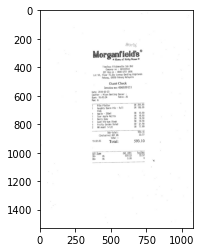

In [29]:
img = cv2.imread("./test/"+df.iloc[18]["image"])
plt.imshow(img)

In [30]:
img.shape

(1528, 1080, 3)

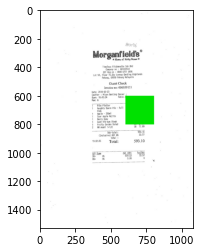

In [28]:
cv2.rectangle(img,(x,y),(x+w,y+h),(0,225,0),-1)
plt.imshow(img)